In [132]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [2]:
from sklearn.datasets import load_iris

In [53]:
data = load_iris()

In [54]:
X, y = data['data'], data['target']

In [55]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [164]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize'] = (16.0, 8.0)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [148]:
def baseline_model(hidden, input):
    # create model
    model = Sequential()
    model.add(Dense(hidden, input_dim=input, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [125]:
mean = []
std = []
for i in range(1,12):
    estimator = KerasClassifier(build_fn= lambda : baseline_model(i, 4), epochs=100, batch_size=5, verbose=0)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(estimator, X, y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    mean.append(results.mean())
    std.append(results.std())
    
#     X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     estimator.fit(X_train, Y_train)

#     Y_pred = estimator.predict(X_test)
#     print(accuracy_score(Y_test, Y_pred))

Baseline: 26.00% (2.49%)
Baseline: 67.33% (21.12%)
Baseline: 66.00% (22.84%)
Baseline: 89.33% (13.06%)
Baseline: 78.00% (19.73%)
Baseline: 94.00% (7.42%)
Baseline: 89.33% (14.82%)
Baseline: 94.67% (4.52%)
Baseline: 97.33% (2.49%)
Baseline: 96.00% (2.49%)
Baseline: 94.67% (4.52%)


In [139]:
mean4 = np.array(mean)
std4 = np.array(std)

In [141]:
F = np.array(X)
lamd, v = np.linalg.eig(np.matmul(F.transpose(), F))
U = v[:,:3]
G = np.matmul(F,U)
X3 = G

[9.20653060e+03 3.14103073e+02 1.20360193e+01 3.53031167e+00]


In [149]:
mean3 = []
std3 = []
for i in range(1,12):
    estimator = KerasClassifier(build_fn= lambda : baseline_model(i, 3), epochs=100, batch_size=5, verbose=0)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(estimator, X3, y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    mean3.append(results.mean())
    std3.append(results.std())
mean3 = np.array(mean3)
std3 = np.array(std3)

Baseline: 54.67% (24.28%)
Baseline: 88.00% (17.46%)
Baseline: 65.33% (6.86%)
Baseline: 86.67% (13.82%)
Baseline: 88.00% (17.46%)
Baseline: 97.33% (2.49%)
Baseline: 91.33% (9.33%)
Baseline: 94.67% (4.52%)
Baseline: 97.33% (2.49%)
Baseline: 96.67% (2.11%)
Baseline: 97.33% (3.27%)


In [152]:
F = np.array(X)
lamd, v = np.linalg.eig(np.matmul(F.transpose(), F))
U = v[:,:2]
print(U)
G = np.matmul(F,U)
X2 = G

[[ 0.75116805  0.28583096]
 [ 0.37978837  0.54488976]
 [ 0.51315094 -0.70889874]
 [ 0.16787934 -0.34475845]]


In [153]:
mean2 = []
std2 = []
for i in range(1,12):
    estimator = KerasClassifier(build_fn= lambda : baseline_model(i, 2), epochs=100, batch_size=5, verbose=0)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(estimator, X2, y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    mean2.append(results.mean())
    std2.append(results.std())
mean2 = np.array(mean2)
std2 = np.array(std2)

Baseline: 51.33% (23.25%)
Baseline: 58.67% (28.72%)
Baseline: 80.00% (26.42%)
Baseline: 92.67% (9.98%)
Baseline: 91.33% (8.33%)
Baseline: 72.00% (30.74%)
Baseline: 97.33% (3.27%)
Baseline: 98.00% (2.67%)
Baseline: 98.00% (2.67%)
Baseline: 96.67% (4.22%)
Baseline: 96.67% (2.98%)


In [182]:
F = np.array(X)
lamd, v = np.linalg.eig(np.matmul(F.transpose(), F))
U = v[:,:1]
print(U)
G = np.matmul(F,U)
X1 = G

[[0.75116805]
 [0.37978837]
 [0.51315094]
 [0.16787934]]


In [183]:
mean1 = []
std1 = []
for i in range(1,12):
    estimator = KerasClassifier(build_fn= lambda : baseline_model(i, 1), epochs=100, batch_size=5, verbose=0)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(estimator, X1, y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    mean1.append(results.mean())
    std1.append(results.std())
mean1 = np.array(mean1)
std1 = np.array(std1)

Baseline: 39.33% (19.02%)
Baseline: 43.33% (17.76%)
Baseline: 36.67% (10.11%)
Baseline: 61.33% (9.80%)
Baseline: 58.67% (14.39%)
Baseline: 43.33% (15.78%)
Baseline: 63.33% (11.16%)
Baseline: 58.67% (13.60%)
Baseline: 54.00% (16.52%)
Baseline: 68.67% (5.42%)
Baseline: 58.67% (13.92%)


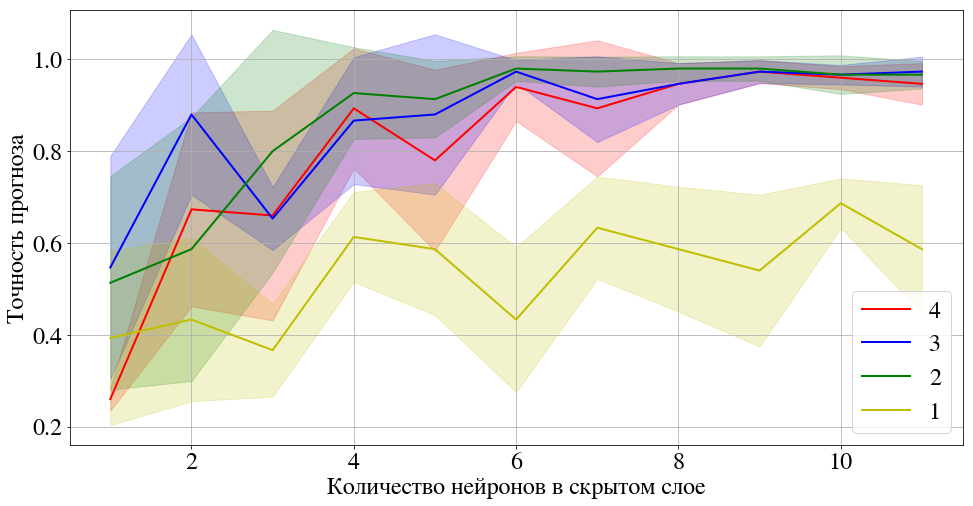

In [184]:
x = np.linspace(1,11,11)
plt.plot(x,mean,color='r',label='4')
plt.fill_between(x, mean-std, mean+std, color='r', alpha=0.2)

plt.plot(x,mean3,color='b',label='3')
plt.fill_between(x, mean3-std3, mean3+std3, color='b', alpha=0.2)

plt.plot(x,mean2,color='g',label='2')
plt.fill_between(x, mean2-std2, mean2+std2,color='g', alpha=0.2)

plt.plot(x,mean1,color='y',label='1')
plt.fill_between(x, mean1-std1, mean1+std1,color='y', alpha=0.2)

plt.legend(loc='best')
plt.xlabel('Количество нейронов в скрытом слое')
plt.ylabel('Точность прогноза')
plt.grid()
plt.savefig('fig_mean.pdf')

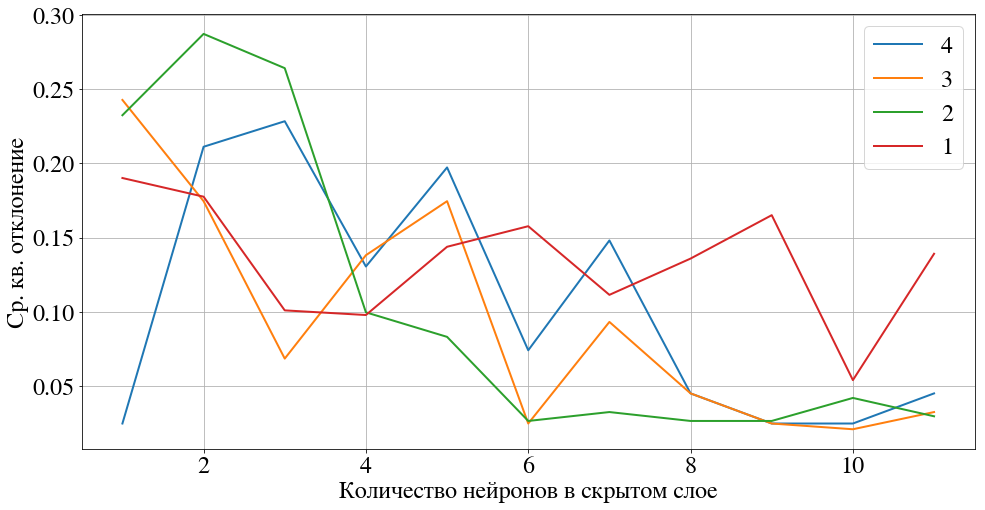

In [185]:
x = np.linspace(1,11,11)
plt.plot(x, std, label = '4')
plt.plot(x, std3, label = '3')
plt.plot(x, std2, label = '2')
plt.plot(x, std1, label = '1')

plt.legend(loc='best')
plt.xlabel('Количество нейронов в скрытом слое')
plt.ylabel('Ср. кв. отклонение')
plt.grid()
plt.savefig('fig_std.pdf')